# **Incêndios florestais no Brasil** <p>
Os incêndios florestais são um grave problema para a preservação das Florestas Tropicais. Compreender a frequência de incêndios florestais em uma série temporal pode ajudar a tomar medidas para evitá-los.
O Brasil tem a maior floresta tropical do planeta que é a floresta amazônica.

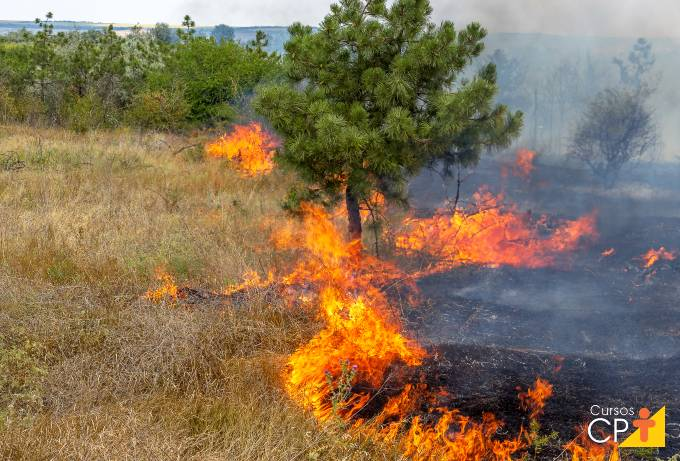

# **Base de Dados**
[Link do Download](https://drive.google.com/file/d/16PCjsLZuxmvxa0LlnTzCELbLVQhO37vN/view?usp=sharing)

In [16]:
# Libs Necessárias

# Libs para Modelagem e Matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [65]:
base_dados = pd.read_csv(r'C:\Users\Joao Paulo\OneDrive\Documents\Python_para_Analise_de_Dados_Data_Viking\Dados_Incendio.csv', encoding='latin-1', sep=',')
base_dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [66]:
# Verificando campos nulos
base_dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

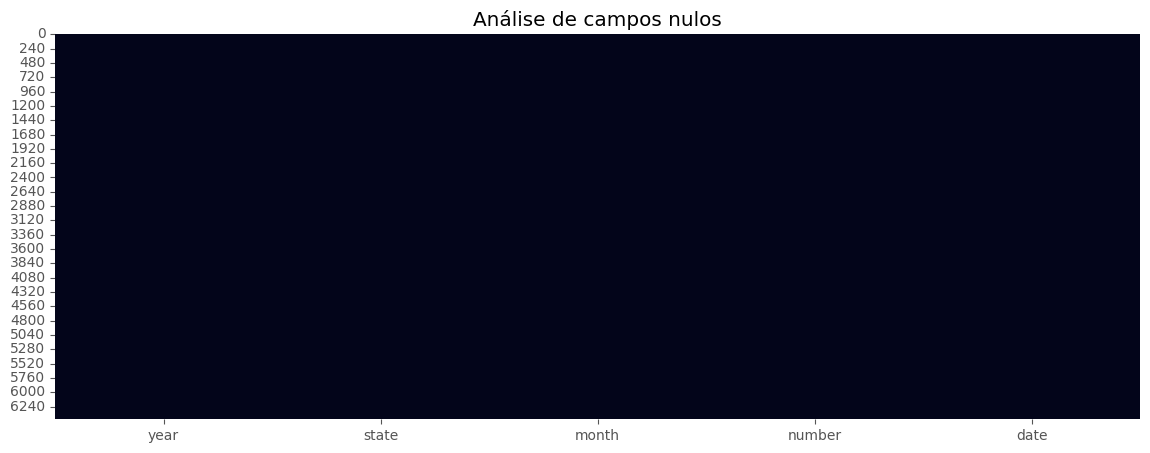

In [67]:
# Verificando campos nulos (plot)
plt.figure(figsize=(14,5))
plt.title('Análise de campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

In [68]:
base_dados.shape

(6454, 5)

In [69]:
# Estatísticas
base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [70]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [71]:
base_dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

Adicionando a informação da sigla:

In [72]:
estados = {
    'estado': ['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'],
    'sigla':['AC',
    'AL',
    'AP',
    'AM',
    'BA',
    'CE',
    'DF',
    'ES',
    'GO',
    'MA',
    'MT',
    'MG',
    'PA',
    'PB',
    'PE',
    'PI',
    'RJ',
    'RO',
    'RR',
    'SC',
    'SP',
    'SE',
    'TO']
}
    


df_estados = pd.DataFrame(estados)
df_estados.head()

,estado,sigla
0,Acre,AC
1,Alagoas,AL
2,Amapa,AP
3,Amazonas,AM
4,Bahia,BA


In [73]:
base_dados = pd.merge(base_dados, df_estados, left_on=['state'], right_on=['estado'], how='left')
base_dados = base_dados.drop(columns=['estado'])
base_dados.head()

,year,state,month,number,date,sigla
0,1998,Acre,Janeiro,0.0,1998-01-01,AC
1,1999,Acre,Janeiro,0.0,1999-01-01,AC
2,2000,Acre,Janeiro,0.0,2000-01-01,AC
3,2001,Acre,Janeiro,0.0,2001-01-01,AC
4,2002,Acre,Janeiro,0.0,2002-01-01,AC


In [74]:
base_dados['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [75]:
base_dados['year'] = base_dados['year'].astype(int)

## Analisando a base:

Text(0, 0.5, 'Período')

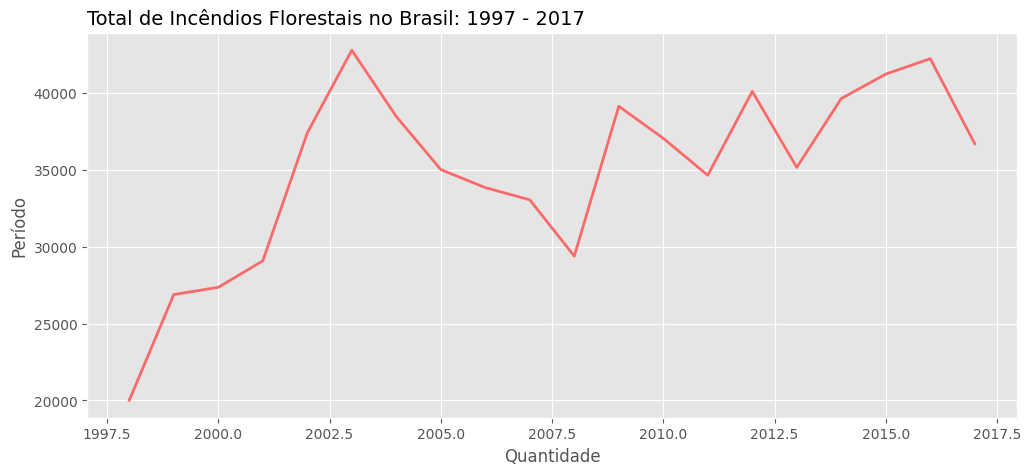

In [76]:
# Análise por ano dos incêndios
analise = base_dados.groupby(by=['year'])['number'].sum().reset_index()

# Tamanho
plt.figure(figsize=(12,5))

# Estilo
plt.style.use('ggplot')

# Gráfico
plt.title('Total de Incêndios Florestais no Brasil: 1997 - 2017', loc='left', fontsize=14)
sns.lineplot(data=analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85)

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período')

Text(0, 0.5, 'Número de incêndios')

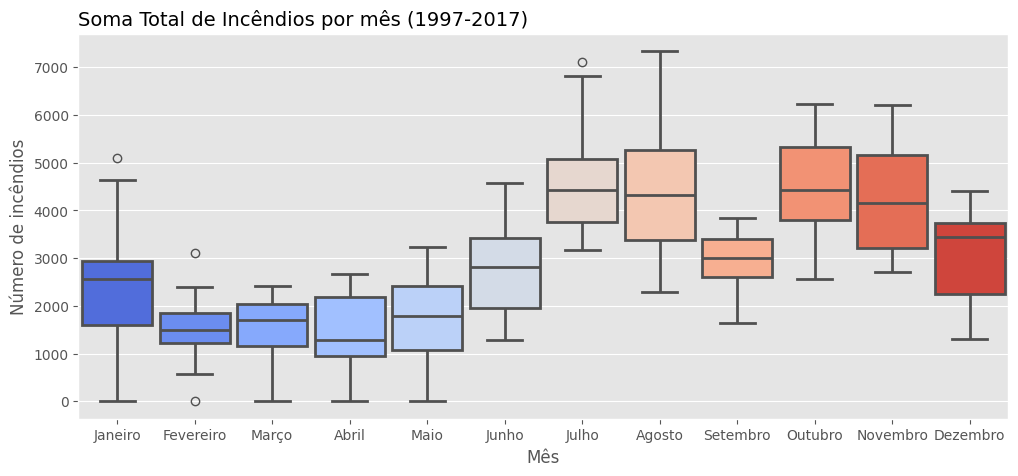

In [77]:
# Análise por mês
analise02 = base_dados.groupby(by=['year', 'month'])['number'].sum().reset_index()

# Tamanho
plt.figure(figsize=(12,5))

# Título
plt.title('Soma Total de Incêndios por mês (1997-2017)', loc='left', fontsize=14)

# Gráfico
sns.boxplot(data=analise02,  x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

# Labels
plt.xlabel('Mês')
plt.ylabel('Número de incêndios')

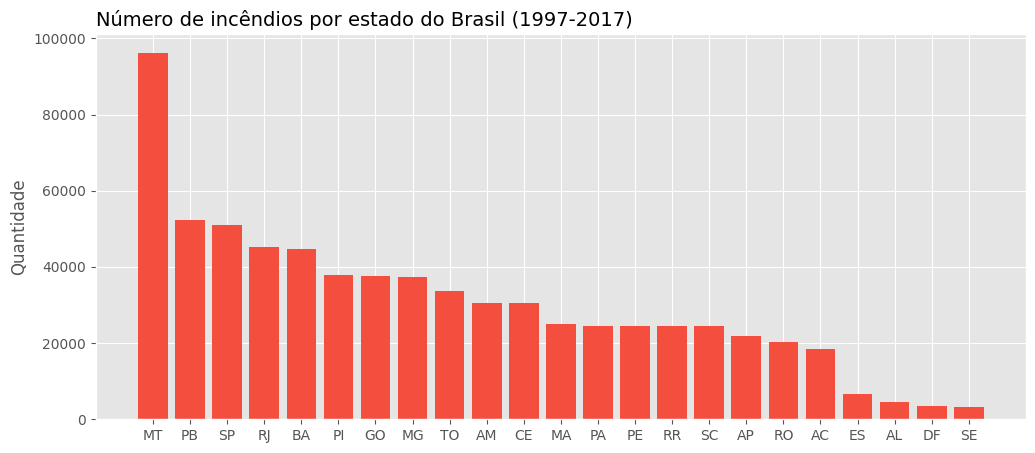

In [79]:
# Análise por estado
analise03 = base_dados.groupby(by=['sigla'])['number'].sum().reset_index().sort_values(by=['number'], ascending=False)

# Tamanho
plt.figure(figsize=(12,5))

# Título
plt.title('Número de incêndios por estado do Brasil (1997-2017)', loc='left', fontsize=14)

# Gráfico
plt.bar(analise03['sigla'], analise03['number'], color='#f44e3f')

# Labels
plt.ylabel('Quantidade');

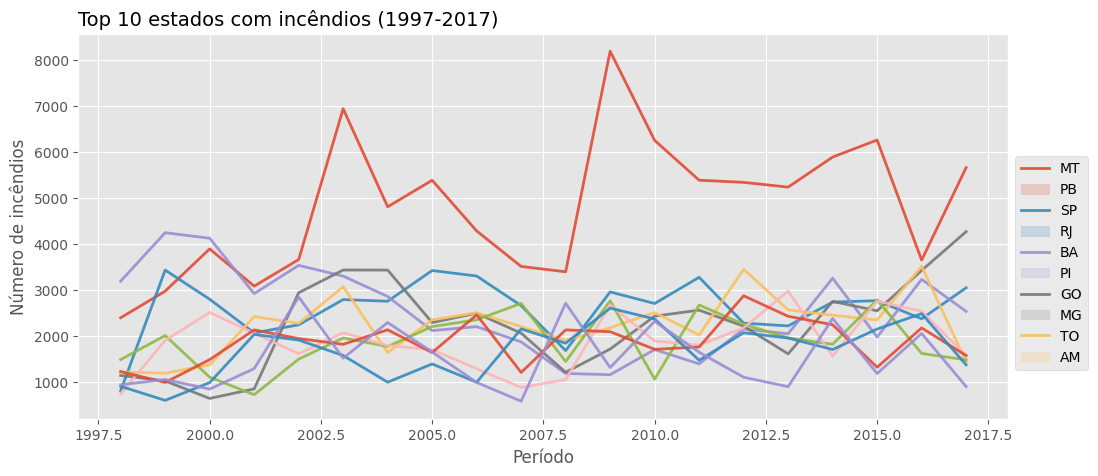

In [91]:
# Vamos analisar os top 10 estados (fazendo uma curva anual)

lista_top_10_estados = analise03['sigla'][0:10].values

# Tamanho
plt.figure(figsize=(12,5))

plt.title('Top 10 estados com incêndios (1997-2017)', loc='left', fontsize=14)

for coluna in lista_top_10_estados:
    # Filtrar o estado
    filtro = base_dados.loc[base_dados['sigla'] == coluna]
    
    # Agrupando os valores para sumarizar
    analise_local = filtro.groupby(by=['year'])['number'].sum().reset_index()
    
    # Plot
    sns.lineplot(data=analise_local, x='year', y='number', lw=2, alpha=0.9)

# Labels
plt.xlabel('Período')
plt.ylabel('Número de incêndios')

# Legenda
plt.legend(lista_top_10_estados, bbox_to_anchor=(1,0.7))

## Plot geográfico

In [93]:
# Gerando os estados
estados = analise03.sort_values(by=['sigla'])['sigla'].values

# Gerando os valores
valores = analise03.sort_values(by=['sigla'])['number'].values

# Latitudes
latitudes = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
longitudes = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizando os dados
dicionario = {
    'Estados': estados,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Incêndios': valores
}

# Lendo o dicionário
analise_geografica = pd.DataFrame(dicionario)
analise_geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,AC,-8.77,-70.55,18464.030
1,AL,-9.71,-35.73,4644.000
2,AM,1.41,-51.77,30650.129
3,AP,-3.07,-61.66,21831.576
4,BA,-12.96,-38.51,44746.226


In [94]:
# Fazendo o plot:
import plotly.express as px

# Mapa de calor geográfico:
px.density_mapbox(
    analise_geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)